### Step 1: What is Two-Way ANOVA, and Why Are We Using It?
The Two-Way ANOVA (Analysis of Variance) allows us to test the influence of two independent variables on one numerical dependent variable. In simpler terms:

We’re interested in whether loan purpose (e.g., debt consolidation, credit card refinancing) and FICO score categories (low, medium, high) impact the interest rates borrowers are charged.
It also lets us explore whether there’s an interaction effect between the two independent variables. For example:

Does the effect of loan purpose on interest rates depend on the borrower’s FICO score?

### Step 2: Setting Up Hypotheses
Before we start, we need to define our hypotheses:

Main Effect 1 — Loan Purpose: Do different loan purposes lead to different interest rates?
Main Effect 2 — FICO Categories: Do different FICO score categories lead to different interest rates?
Interaction Effect: Does the relationship between loan purpose and interest rates depend on FICO score categories?

### Step 3: Understanding the Mathematical Formulas Behind Two-Way ANOVA
Here’s what the test will do:

The F-statistic is still the main component, and we calculate three different F-statistics:

F-statistic for Loan Purpose (Main Effect 1)

F-statistic for FICO Category (Main Effect 2)

F-statistic for Interaction Effect (Loan Purpose x FICO Category)

But this time, we have:

Variation Between Groups for both loan purpose and FICO category.
An additional term for the interaction between the two variables.

### Step 4: Preparing the Data — Let’s Categorize FICO Scores

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("Data/loansdata.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


#### Dataset

The original data used in this exercise comes from publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet.

You can download the data here.

Our dataset contains several useful columns, but for this analysis, we’ll focus on three key columns — purpose , int.rateand fico— as discussed above.

Now, move to converting the fico variable into bins, for which we look at the descriptive statistics of the variable.

In [2]:
df['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

The summary statistics gives us the clue that we will be good if we keep it in three categories, one below the first quartile (682), one above the third quartile (737), and everything else in the middle ( between 682 and 737).

With this logic, I create the bins for the fico variable with the code below. We also renamed the int.rate variable to interest_rate just to make it more intuitive.

In [3]:
# Define FICO categories (low, medium, high)
bins = [0, 682, 737, 850]
labels = ['Low', 'Medium', 'High']

df['fico_category'] = pd.cut(df['fico'], bins=bins, labels=labels)
df = df.rename(columns={'int.rate': 'interest_rate'})

df.columns

Index(['credit.policy', 'purpose', 'interest_rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'fico_category'],
      dtype='object')

Now, we have two categorical variables: `purpose` and `fico_category`. The dependent variable is the `interest_rate`.

The next step is to conduct the test.

### Step 5: Conduct Two-Way ANOVA test

In [4]:
# Define the formula for Two-Way ANOVA
formula = 'interest_rate ~ C(purpose) + C(fico_category) + C(purpose):C(fico_category)'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Perform Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_table)

                               sum_sq      df            F         PR(>F)
C(purpose)                   0.308255     6.0   141.433113  2.181413e-172
C(fico_category)             3.064188     2.0  4217.715117   0.000000e+00
C(purpose):C(fico_category)  0.015928    12.0     3.654104   1.670027e-05
Residual                     3.471601  9557.0          NaN            NaN


### Step 6: Interpreting the Results

After running the above code, we got an ANOVA table with three important sections, as shown in the above output:

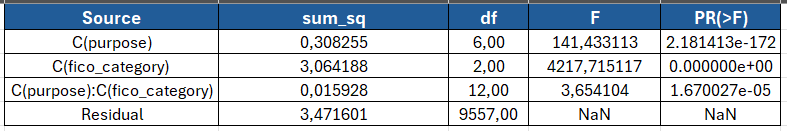

1. C(purpose) (Main Effect of Loan Purpose)
sum_sq: This is the amount of variation in interest rates that can be explained by loan purpose.
df (degrees of freedom): There are 6 degrees of freedom for loan purpose (indicating 7 loan purpose categories).
F (F-statistic): The F-statistic (141.43) is a ratio of the variance between the loan purposes to the variance within the loan purposes. A larger F-statistic indicates a more significant effect.
PR(>F) (p-value): The p-value here is 2.18e-172, which is extremely small (essentially zero). This means that we reject the null hypothesis and conclude that loan purpose significantly affects interest rates.

2. C(fico_category) (Main Effect of FICO Category)
sum_sq: This is the amount of variation in interest rates that can be explained by FICO score category.
df: There are 2 degrees of freedom for FICO categories (indicating 3 categories: low, medium, and high).
F (F-statistic): The F-statistic for FICO categories is an enormous 4217.71, meaning that the variation in interest rates due to FICO scores is quite substantial.
PR(>F) (p-value): The p-value is 0.00 (rounded), which means we reject the null hypothesis. This indicates that FICO category has a very significant effect on interest rates.

3. C(purpose)(fico_category) (Interaction Effect)
sum_sq: This is the variation in interest rates that can be explained by the interaction between loan purpose and FICO score categories.
df: There are 12 degrees of freedom for the interaction.
F (F-statistic): The F-statistic here is 3.65, indicating that the interaction between loan purpose and FICO category is also important.
PR(>F) (p-value): The p-value for the interaction is 1.67e-05, which is very small (less than 0.05), so we reject the null hypothesis for the interaction effect as well. This means that the effect of loan purpose on interest rates depends on the FICO score category.

4. Residual
The Residual sum of squares represents the variation in interest rates that is unexplained by the model (i.e., the “noise” or random variation).

##### Interpretation in Simple Terms:
Loan Purpose Matters: 
The loan purpose has a significant impact on the interest rate. Borrowers applying for different loan purposes (e.g., debt consolidation vs. home improvement) are likely to receive different interest rates.

FICO Score Matters Even More: 
The FICO score category has an even bigger impact on the interest rate. Borrowers with higher FICO scores (better credit) tend to get lower interest rates, while those with lower FICO scores are charged higher rates.

There’s an Interaction Effect: 
The relationship between loan purpose and interest rate isn’t the same for all FICO categories. For example, a borrower with a low FICO score applying for a credit card loan might get a much higher rate than someone with a high FICO score applying for the same loan.

Step 7. Real-World Conclusion:

Financial institutions adjust interest rates based on both loan purpose and credit score.
The interaction effect tells us that the impact of the loan purpose on the interest rate is not the same across different credit scores. This means lenders might be more cautious (with higher rates) for some loan purposes when the borrower has a lower FICO score.